<a href="https://www.kaggle.com/code/aneevinay/trends-in-vehicle-over-years?scriptVersionId=251026741" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Problem Statement

Title: Analyzing the Trend of Vehicle Population Growth in India (1951–2022)

## Objective:

To study how the number of registered vehicles in India has evolved over the decades, using official historical data from 1951 to 2022. This analysis aims to uncover the rate of growth, patterns across different decades, and the impact of socio-economic and policy changes on vehicle registrations.

## Key Questions:

* How has the vehicle population changed decade by decade?
* Which decades saw the highest growth in vehicle registrations?
* What does the trend tell us about urbanization, mobility needs, and transport infrastructure in India?
* Can we identify significant growth patterns or disruptions (e.g., economic reforms, COVID-19)?

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [2]:
df = pd.read_csv("/kaggle/input/vehicle-population1951-2022/vehicle_population_combined_final.csv")
df.head()

,Year,All Vehicles,Two Wheelers,Cars_Jeeps_Taxis,Buses,Goods Vehicles,Other Vehicles
0,1951,306.0,27.0,159.0,34.0,82.0,4.0
1,1956,426.0,41.0,203.0,47.0,119.0,16.0
2,1959,562.0,67.0,267.0,48.0,148.0,32.0
3,1960,605.0,76.0,282.0,54.0,157.0,36.0
4,1961,665.0,88.0,310.0,57.0,168.0,42.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              66 non-null     int64  
 1   All Vehicles      66 non-null     float64
 2   Two Wheelers      66 non-null     float64
 3   Cars_Jeeps_Taxis  66 non-null     float64
 4   Buses             66 non-null     float64
 5   Goods Vehicles    66 non-null     float64
 6   Other Vehicles    66 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 3.7 KB


In [4]:
df['Year'].duplicated().sum()

0

> There is no missing values and no duplicates in year

# year wise analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


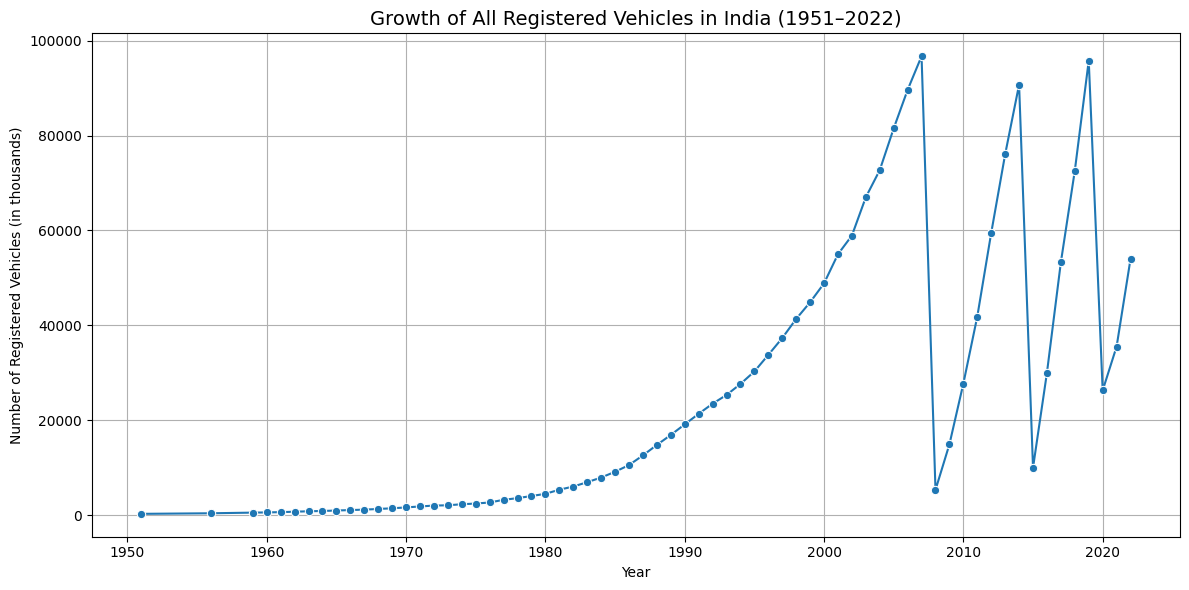

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='All Vehicles', marker='o')
plt.title("Growth of All Registered Vehicles in India (1951–2022)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Registered Vehicles (in thousands)")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('Growth_of_all_vehicle.png')

### Final Takeaways

* Massive vehicle growth reflects India’s economic and infrastructural development over decades.
* **1990**s onward saw rapid acceleration due to liberalization and rising incomes.
* Notable slowdowns align with major events like the **2008** crisis, **2016** demonetization, and **2020** pandemic.
* Recent trends suggest gradual recovery, with possible shifts in mobility preferences.

## Category-Wise Trends

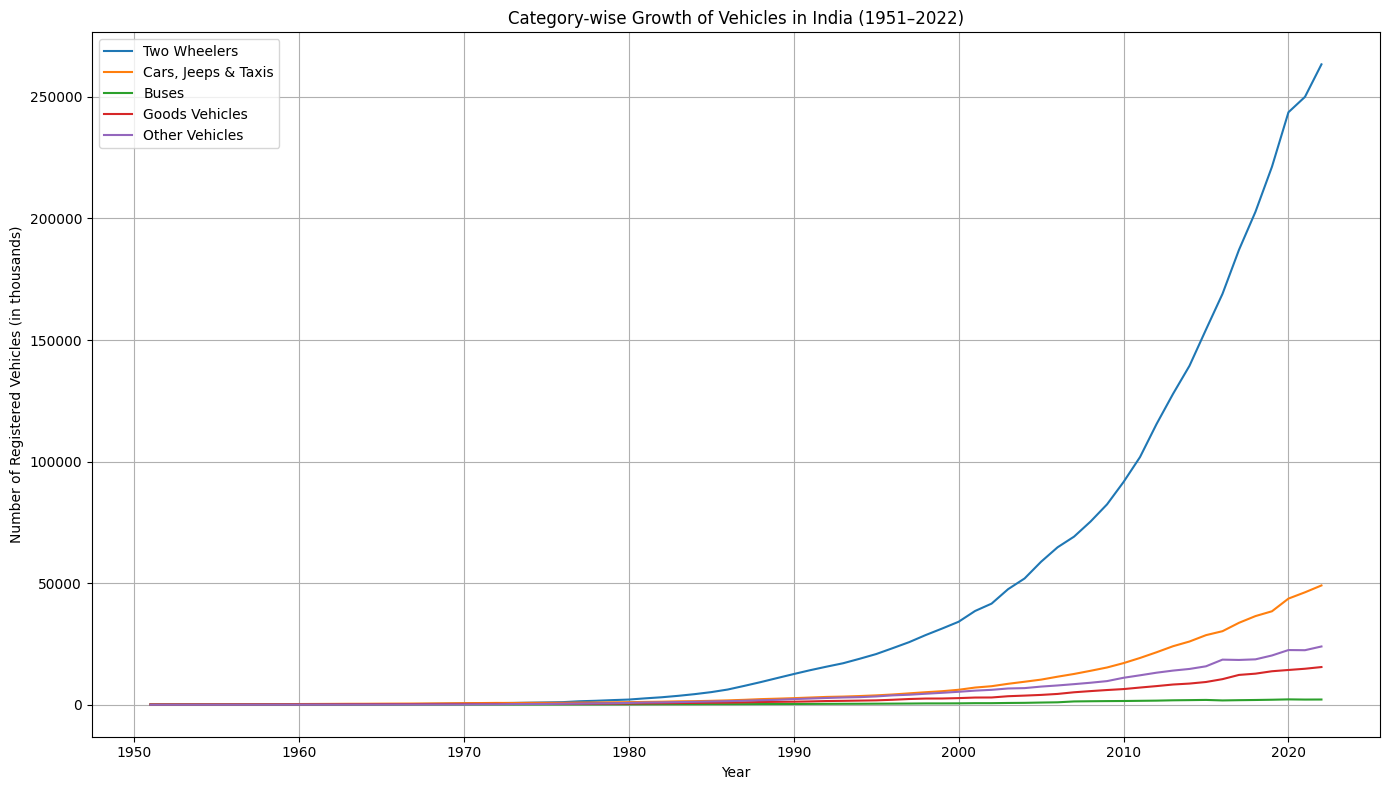

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure(figsize=(14, 8))
plt.plot(df["Year"], df["Two Wheelers"], label="Two Wheelers")
plt.plot(df["Year"], df["Cars_Jeeps_Taxis"], label="Cars, Jeeps & Taxis")
plt.plot(df["Year"], df["Buses"], label="Buses")
plt.plot(df["Year"], df["Goods Vehicles"], label="Goods Vehicles")
plt.plot(df["Year"], df["Other Vehicles"], label="Other Vehicles")
plt.title("Category-wise Growth of Vehicles in India (1951–2022)")
plt.xlabel("Year")
plt.ylabel("Number of Registered Vehicles (in thousands)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.savefig('Category_wise_growth of vehicles.png')

### Final Takeaways 

* **Two Wheelers** dominate vehicle growth — a clear indicator of affordability and personal mobility preference.
* **Cars, Jeeps & Taxis** have grown steadily, especially post-1991 economic liberalization.
* **Goods Vehicles and Other Vehicles** show a rising trend, reflecting growing logistics and commercial transport.
* **Buses** have the slowest growth, suggesting underinvestment or shifting preference to personal/public shared transport alternatives.

## Decade-Wise Summary

In [7]:
# Create a 'Decade' column
df['Decade'] = (df['Year'] // 10) * 10

In [8]:
# Group by Decade and calculate mean
decade_summary = df.groupby('Decade').mean(numeric_only=True).reset_index()
decade_summary

,Decade,Year,All Vehicles,Two Wheelers,Cars_Jeeps_Taxis,Buses,Goods Vehicles,Other Vehicles
0,1950,1955.333333,431.333333,45.0,209.666667,43.0,116.333333,17.333333
1,1960,1964.500000,987.400000,206.6,415.700000,68.9,230.300000,65.900000
2,1970,1974.500000,2610.900000,1023.1,786.500000,109.1,357.600000,334.600000
3,1980,1984.500000,9499.200000,5523.3,1647.700000,210.1,801.900000,1316.200000
4,1990,1994.500000,30469.500000,20821.3,3917.700000,419.3,1864.900000,3446.300000
5,2000,2004.500000,59062.500000,56410.5,10262.200000,946.7,4110.600000,7332.600000
6,2010,2014.500000,55757.500000,151051.1,27538.900000,1809.3,9681.400000,15676.800000
7,2020,2021.000000,38622.666667,252351.0,46309.666667,2152.0,14857.666667,22952.333333


In [9]:
decade_start = df.groupby('Decade').first().reset_index()
decade_end = df.groupby('Decade').last().reset_index()

decade_growth = decade_end.copy()
cols = ['All Vehicles', 'Two Wheelers', 'Cars_Jeeps_Taxis', 'Buses', 'Goods Vehicles', 'Other Vehicles']
for col in cols:
    decade_growth[col] = decade_end[col].values - decade_start[col].values

decade_growth = decade_growth[['Decade'] + cols]

### Visualization -Stacked Bar plot

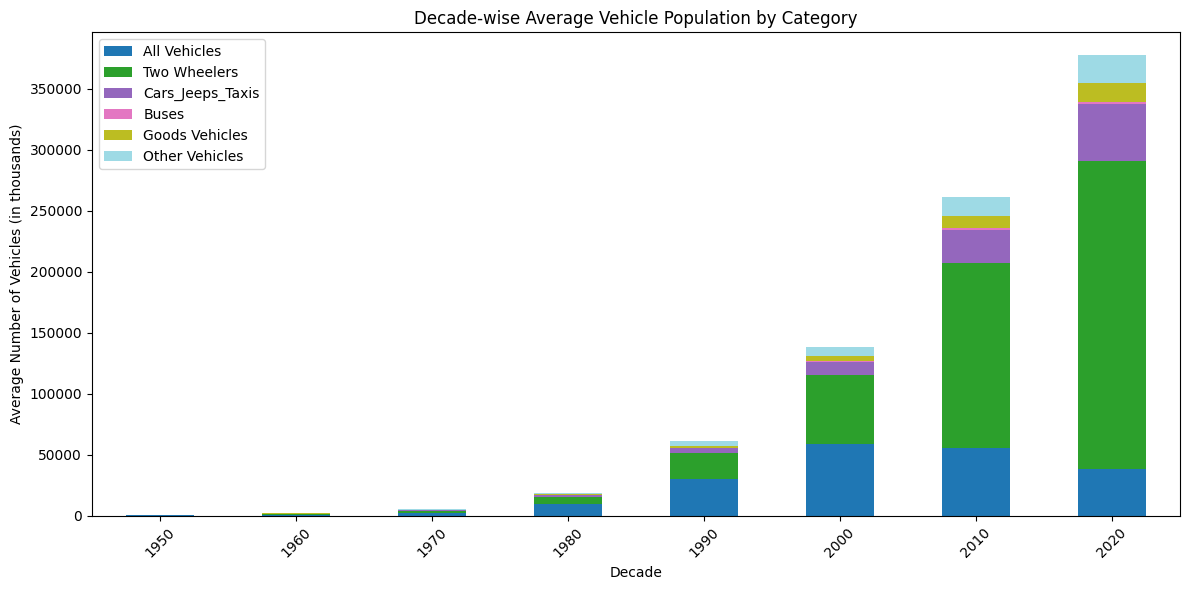

<Figure size 640x480 with 0 Axes>

In [10]:
plot_df = decade_summary.copy()

plot_df.set_index('Decade')[cols].plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Decade-wise Average Vehicle Population by Category')
plt.ylabel('Average Number of Vehicles (in thousands)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('Decade_wise_average_vehicle population.png')

### Visualization -Line plot to show growth

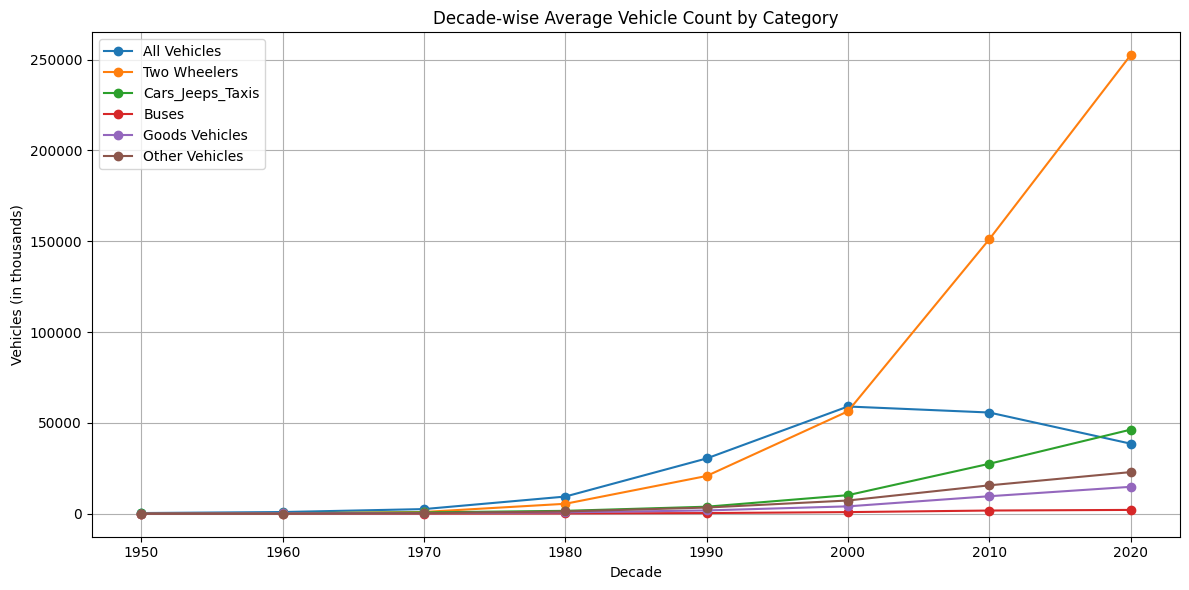

<Figure size 640x480 with 0 Axes>

In [11]:
plot_df.set_index('Decade')[cols].plot(kind='line', marker='o', figsize=(12,6))
plt.title('Decade-wise Average Vehicle Count by Category')
plt.ylabel('Vehicles (in thousands)')
plt.grid(True)
plt.xticks(plot_df['Decade'])
plt.tight_layout()
plt.show()

plt.savefig('Decade_wise_average_vehicle_count.png')

## Coorelation Analysis

/tmp/ipykernel_13/1598018016.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


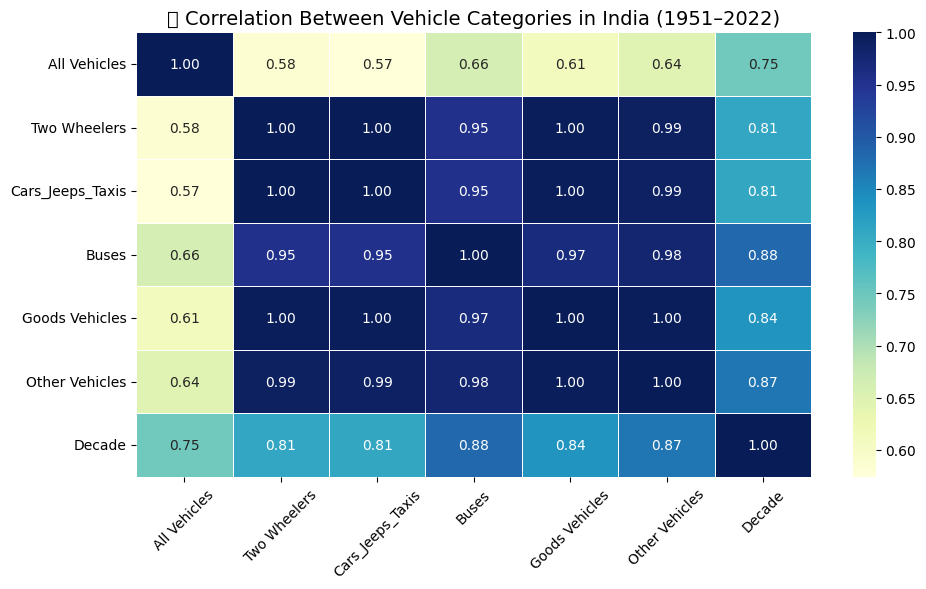

<Figure size 640x480 with 0 Axes>

In [12]:
# Drop the 'Year' column, since it's not a numeric feature for correlation
corr = df.drop(columns='Year').corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title("📊 Correlation Between Vehicle Categories in India (1951–2022)", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

plt.savefig('Correlation_analysis_heatmap.png')

 ### Key Points

 * Strong correlation observed between Two Wheelers, Cars/Jeeps/Taxis, and Goods Vehicles (correlation ≈ 1.00).

* Buses and Other Vehicles also show high correlation with other categories (> 0.95).

* Decade is positively correlated with all vehicle types, confirming consistent growth over time.

* All Vehicles shows moderate correlation with individual categories, indicating diverse growth contribution.

* Insights support the importance of balanced infrastructure planning for multiple vehicle types.

# 📌 Conclusion

* Massive rise in vehicle registrations since 1980, especially post-2000.
* Two Wheelers dominate the growth, reflecting affordability and demand for personal mobility.
* Personal vehicles outpace public transport, indicating changing travel preferences.
* Goods Vehicles increased, supporting expanding trade and logistics.
* Bus growth remains slow, signaling a lag in public transport infrastructure.